### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder as le
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn import tree


### Import dan Cek Dataset

In [2]:
df_pumpkin = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
df_pumpkin.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [3]:
print("Data Shape : ",df_pumpkin.shape)

Data Shape :  (2500, 13)


In [4]:
df_pumpkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [5]:
df_pumpkin.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [6]:
df_pumpkin.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [7]:
df_pumpkin['Class'].value_counts()

Class
Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: count, dtype: int64

In [8]:
encoder = le()
df_pumpkin['Class'] = encoder.fit_transform(df_pumpkin['Class'])
df_pumpkin['Class'].value_counts()

Class
0    1300
1    1200
Name: count, dtype: int64

### Train Test Split

In [9]:
x = df_pumpkin.drop('Class', axis=1)
y = df_pumpkin['Class']

In [10]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Modeling,Evaluasi, dan Prediksi

In [31]:
klasifikasi = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=15,random_state=0)
klasifikasi.fit(x_train,y_train)
single_tree = klasifikasi.estimators_[5]

In [32]:
y_pred = klasifikasi.predict(x_test)
CLF = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print("Nilai Akurasi Random Forest : {:.2f}".format(CLF*100))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       256
           1       0.89      0.84      0.87       244

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500

Nilai Akurasi Random Forest : 87.20


### Visualisasi Pohon

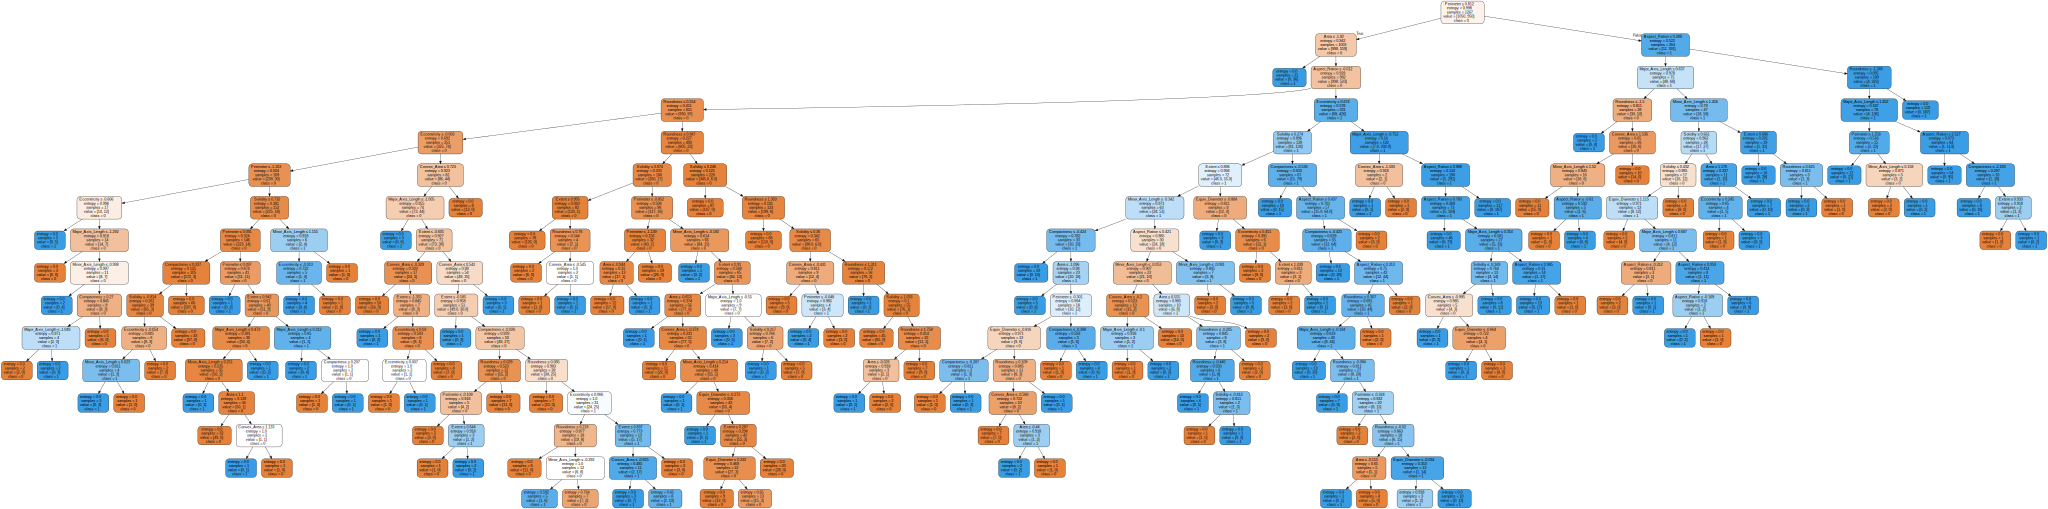

In [33]:
dot_data = tree.export_graphviz(single_tree, out_file=None, feature_names=['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration', 'Compactness'], class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Test Data Baru dan Buat Model

In [34]:
new_pumpkin = {
    'Area': [40], 
    'Perimeter': [98], 
    'Major_Axis_Length': [76], 
    'Minor_Axis_Length': [17], 
    'Convex_Area': [43], 
    'Equiv_Diameter': [54], 
    'Eccentricity': [65], 
    'Solidity': [87], 
    'Extent': [13], 
    'Roundness': [32], 
    'Aspect_Ration': [43], 
    'Compactness': [23]
}

new_pumpkin = pd.DataFrame(new_pumpkin)
new_pumpkin

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,40,98,76,17,43,54,65,87,13,32,43,23


In [35]:
scaled_new_data = scaler.transform(new_pumpkin)
y_pred_new = klasifikasi.predict(scaled_new_data)

print("Labu yang di prediksi termasuk jenis :",encoder.inverse_transform(y_pred_new))

Labu yang di prediksi termasuk jenis : ['Ürgüp Sivrisi']


In [36]:
import pickle
pickle.dump(klasifikasi, open('RFC_pumpkin.pkl', 'wb'))